In [3]:
import json
import pprint

# read the dataset
split = 'train'
data_path = '/kaggle/input/raw-dataset/ALL/jsonl/' + split + '.jsonl'
train_data = []
with open(data_path) as f:
    for line in f:
        train_data.append(json.loads(line))

n_meetings = len(train_data)
print('Total {} meetings in the {} set.'.format(n_meetings, split))


Total 162 meetings in the train set.


In [11]:
import json

# read the dataset
# please enter the path of your data
split = 'val'
data_path = '/kaggle/input/raw-dataset/ALL/jsonl/' + split + '.jsonl'
val_data = []
with open(data_path) as f:
    for line in f:
        val_data.append(json.loads(line))
n_meetings = len(val_data)
print('Total {} meetings in the {} set.'.format(n_meetings, split))

Total 35 meetings in the val set.


In [12]:
import json

# read the dataset
# please enter the path of your data
split = 'test'
data_path = '/kaggle/input/raw-dataset/ALL/jsonl/' + split + '.jsonl'
test_data = []
with open(data_path) as f:
    for line in f:
        test_data.append(json.loads(line))
n_meetings = len(test_data)
print('Total {} meetings in the {} set.'.format(n_meetings, split))

Total 35 meetings in the test set.


[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


Total Meetings: 162
Total General Queries: 162
Total Specific Queries: 1095


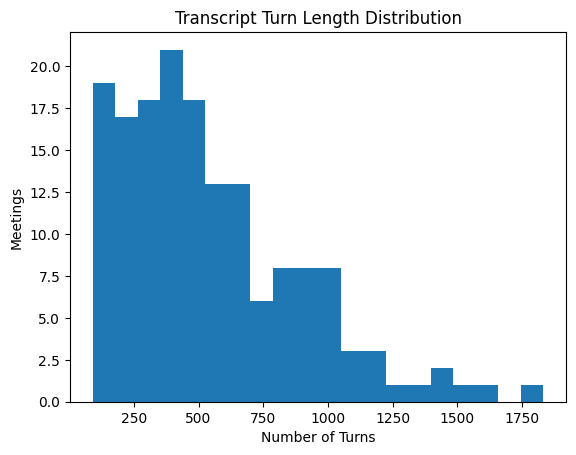

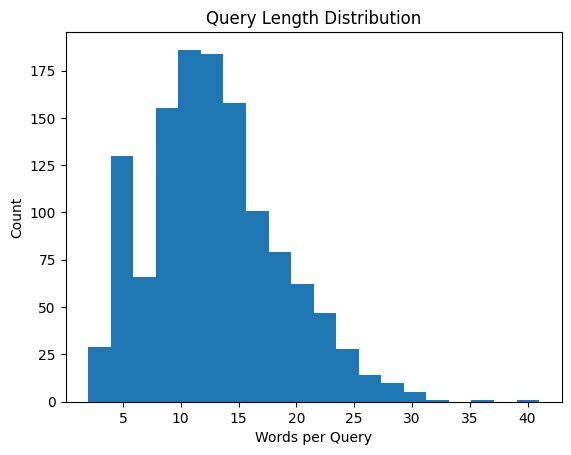


Sample Meeting Data Structure:
{'general_query_list': [{...}],
 'meeting_transcripts': [{...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
                         {...},
        

In [4]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


# Basic stats
print(f"Total Meetings: {len(train_data)}")

num_general_queries = sum(len(d['general_query_list']) for d in train_data)
num_specific_queries = sum(len(d['specific_query_list']) for d in train_data)
print(f"Total General Queries: {num_general_queries}")
print(f"Total Specific Queries: {num_specific_queries}")

# Distribution of transcript lengths
transcript_lengths = [len(d['meeting_transcripts']) for d in train_data]
plt.hist(transcript_lengths, bins=20)
plt.title("Transcript Turn Length Distribution")
plt.xlabel("Number of Turns")
plt.ylabel("Meetings")
plt.show()

# Average query length (in words)
all_queries = []
for d in train_data:
    for item in d['general_query_list'] + d['specific_query_list']:
        all_queries.append(len(word_tokenize(item['query'])))

plt.hist(all_queries, bins=20)
plt.title("Query Length Distribution")
plt.xlabel("Words per Query")
plt.ylabel("Count")
plt.show()

# Example structure print
print("\nSample Meeting Data Structure:")
import pprint
pprint.pprint(train_data[0], depth=2)


Total Meetings: 35
Total General Queries: 35
Total Specific Queries: 237


[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


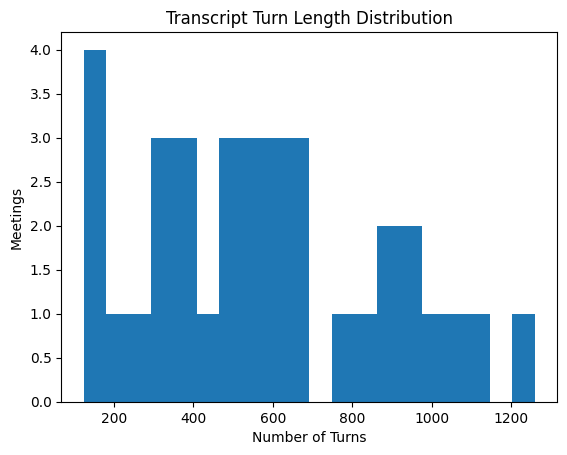

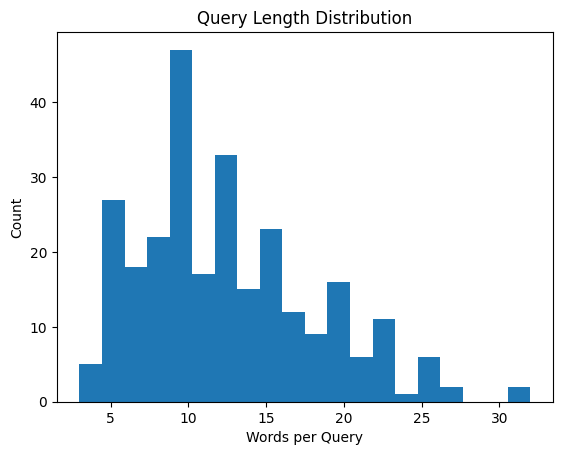

In [15]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


# Basic stats
print(f"Total Meetings: {len(val_data)}")

num_general_queries = sum(len(d['general_query_list']) for d in val_data)
num_specific_queries = sum(len(d['specific_query_list']) for d in val_data)
print(f"Total General Queries: {num_general_queries}")
print(f"Total Specific Queries: {num_specific_queries}")

# Distribution of transcript lengths
transcript_lengths = [len(d['meeting_transcripts']) for d in val_data]
plt.hist(transcript_lengths, bins=20)
plt.title("Transcript Turn Length Distribution")
plt.xlabel("Number of Turns")
plt.ylabel("Meetings")
plt.show()

# Average query length (in words)
all_queries = []
for d in val_data:
    for item in d['general_query_list'] + d['specific_query_list']:
        all_queries.append(len(word_tokenize(item['query'])))

plt.hist(all_queries, bins=20)
plt.title("Query Length Distribution")
plt.xlabel("Words per Query")
plt.ylabel("Count")
plt.show()

# # Example structure print
# print("\nSample Meeting Data Structure:")
# import pprint
# pprint.pprint(val_data[0], depth=2)


Total Meetings: 35
Total General Queries: 37
Total Specific Queries: 244


[nltk_data] Error loading punkt: <urlopen error [Errno -3] Temporary
[nltk_data]     failure in name resolution>


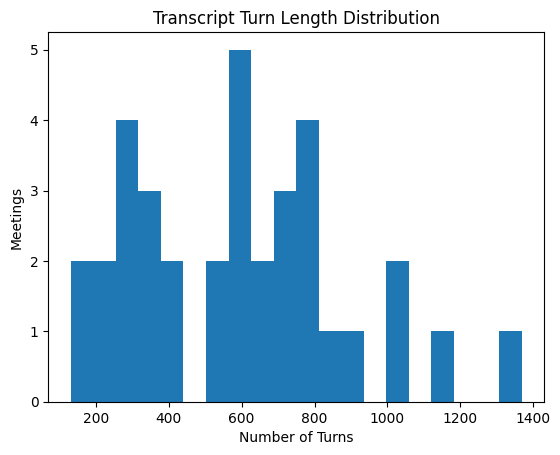

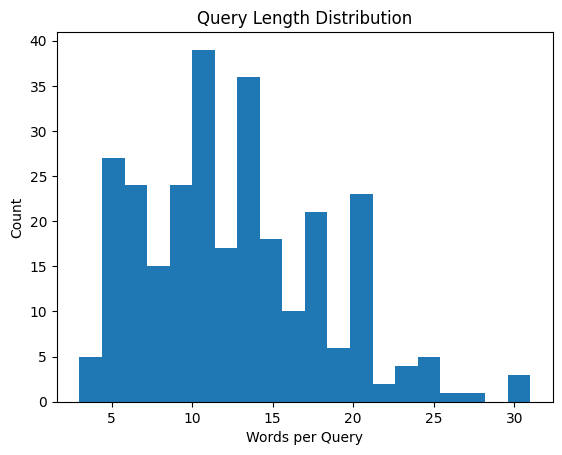

In [16]:
import json
from collections import Counter
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize


# Basic stats
print(f"Total Meetings: {len(test_data)}")

num_general_queries = sum(len(d['general_query_list']) for d in test_data)
num_specific_queries = sum(len(d['specific_query_list']) for d in test_data)
print(f"Total General Queries: {num_general_queries}")
print(f"Total Specific Queries: {num_specific_queries}")

# Distribution of transcript lengths
transcript_lengths = [len(d['meeting_transcripts']) for d in test_data]
plt.hist(transcript_lengths, bins=20)
plt.title("Transcript Turn Length Distribution")
plt.xlabel("Number of Turns")
plt.ylabel("Meetings")
plt.show()

# Average query length (in words)
all_queries = []
for d in test_data:
    for item in d['general_query_list'] + d['specific_query_list']:
        all_queries.append(len(word_tokenize(item['query'])))

plt.hist(all_queries, bins=20)
plt.title("Query Length Distribution")
plt.xlabel("Words per Query")
plt.ylabel("Count")
plt.show()

# Example structure print
# print("\nSample Meeting Data Structure:")
# import pprint
# pprint.pprint(test_data[0], depth=2)


In [5]:
from nltk import word_tokenize
# tokneize a sent
def tokenize(sent):
    tokens = ' '.join(word_tokenize(sent.lower()))
    return tokens

# filter some noises caused by speech recognition
def clean_data(text):
    text = text.replace('{ vocalsound } ', '')
    text = text.replace('{ disfmarker } ', '')
    text = text.replace('a_m_i_', 'ami')
    text = text.replace('l_c_d_', 'lcd')
    text = text.replace('p_m_s', 'pms')
    text = text.replace('t_v_', 'tv')
    text = text.replace('{ pause } ', '')
    text = text.replace('{ nonvocalsound } ', '')
    text = text.replace('{ gap } ', '')
    return text

In [18]:
# process data for BART
# the input of the model here is the entire content of the meeting
bart_data = []
for i in range(len(train_data)):
    # get meeting content
    src = []
    for k in range(len(train_data[i]['meeting_transcripts'])):
        cur_turn = train_data[i]['meeting_transcripts'][k]['speaker'].lower() + ': '
        cur_turn = cur_turn + tokenize(train_data[i]['meeting_transcripts'][k]['content'])
        src.append(cur_turn)
    src = ' '.join(src)
    for j in range(len(train_data[i]['general_query_list'])):
        cur = {}
        query = tokenize(train_data[i]['general_query_list'][j]['query'])
        cur['src'] = clean_data('<s> ' + query + ' </s> ' + src + ' </s>')
        target = tokenize(train_data[i]['general_query_list'][j]['answer'])
        cur['tgt'] = target
        bart_data.append(cur)
    for j in range(len(train_data[i]['specific_query_list'])):
        cur = {}
        query = tokenize(train_data[i]['specific_query_list'][j]['query'])
        cur['src'] = clean_data('<s> ' + query + ' </s> ' + src + ' </s>')
        target = tokenize(train_data[i]['specific_query_list'][j]['answer'])
        cur['tgt'] = target
        bart_data.append(cur)
        
print('Total {} query-summary pairs in the {} set'.format(len(bart_data), split))
print(bart_data[2])
with open('/kaggle/working/bart_' + split + '.jsonl', 'w') as f:
    for i in range(len(bart_data)):
        print(json.dumps(bart_data[i]), file=f)

for i in range(2):
    print(f"\nSample {i+1}:")
    print("Source (src):", bart_data[i]['src'][:300], "...")  # truncate for readability
    print("Target (tgt):", bart_data[i]['tgt'])


Total 1257 query-summary pairs in the test set
{'src': "<s> how did marketing design the product evaluation ? </s> project manager: yep . soon as i get this . okay . this is our last meeting . um i 'll go ahead and go through the minutes from the previous meeting . uh and then we 'll have a , the prototype presentation . um then we will um do an evaluation . uh or we 'll see what , what we need to have under the criteria for the evaluation . then we 'll go through the finance and see if we fall within the budget . um then we 'll do the evaluation , and then we can finish up after that with um any changes that we 'll need to make , or hopefully everything will fall right in line . um let 's see , minutes from the last meeting . um we looked at uh the the trends . we had uh the fashion trends that people want a fancy look-and-feel . it was twice as important as anything else . um they liked fruit and vegetables in the new styles . um and a spongy feel . so we were talking about trying to

In [6]:
# process data for BART
# the input of the model here is the gold span corresponding to each query
bart_data_gold = []
for i in range(len(train_data)):
    # get meeting content
    entire_src = []
    for k in range(len(train_data[i]['meeting_transcripts'])):
        cur_turn = train_data[i]['meeting_transcripts'][k]['speaker'].lower() + ': '
        cur_turn = cur_turn + tokenize(train_data[i]['meeting_transcripts'][k]['content'])
        entire_src.append(cur_turn)
    entire_src = ' '.join(entire_src)
    for j in range(len(train_data[i]['general_query_list'])):
        cur = {}
        query = tokenize(train_data[i]['general_query_list'][j]['query'])
        cur['src'] = clean_data('<s> ' + query + ' </s> ' + entire_src + ' </s>')
        target = tokenize(train_data[i]['general_query_list'][j]['answer'])
        cur['tgt'] = target
        bart_data_gold.append(cur)
    for j in range(len(train_data[i]['specific_query_list'])):
        cur = {}
        query = tokenize(train_data[i]['specific_query_list'][j]['query'])
        src = []
        # get the content in the gold span for each query
        for span in train_data[i]['specific_query_list'][j]['relevant_text_span']:
            assert len(span) == 2
            st, ed = int(span[0]), int(span[1])
            for k in range(st, ed + 1):
                cur_turn = train_data[i]['meeting_transcripts'][k]['speaker'].lower() + ': '
                cur_turn = cur_turn + tokenize(train_data[i]['meeting_transcripts'][k]['content'])
                src.append(cur_turn)
        src = ' '.join(src)
        cur['src'] = clean_data('<s> ' + query + ' </s> ' + src + ' </s>')
        target = tokenize(train_data[i]['specific_query_list'][j]['answer'])
        cur['tgt'] = target
        bart_data_gold.append(cur)
        
print('Total {} query-summary pairs in the {} set'.format(len(bart_data_gold), split))
print(bart_data_gold[2])
with open('/kaggle/working/bart_' + split + '._gold.jsonl', 'w') as f:
    for i in range(len(bart_data_gold)):
        print(json.dumps(bart_data_gold[i]), file=f)


for i in range(2):
    print(f"\nSample {i+1}:")
    print("Source (src):", bart_data_gold[i]['src'][:300], "...")  # truncate for readability
    print("Target (tgt):", bart_data_gold[i]['tgt'])


Total 1257 query-summary pairs in the train set
{'src': "<s> how did marketing design the product evaluation ? </s> marketing: i do . okay . you guys are gon na help me do an evaluation of the criteria . um . okay . so first i 'll just discuss some of the criteria that i found . just based on the past trend reports that i was looking at earlier . and then we 'll do a group evaluation of the prototype . and then we will calculate the average score to see how we did . um so the criteria we 're gon na be looking at are the complaints um that we heard from the users who were interviewed earlier . so we 're gon na be doing it based on a seven point scale . and one is going to mean true , that we did actually achieve that . with seven being false , we did not achieve that . . okay . so for the first one , we need to decide , did we solved the problem of the users who complained about an ugly remote ? industrial designer: . user interface: project manager: i think it 's definitely different t

In [ ]:
pip install evaluate
pip install bert-score
pip install rouge_score
pipinstall datasets

# Model Training & Evaluation:

## 1.BART BASED MODEL :

In [ ]:
from datasets import load_dataset
from transformers import BartTokenizer
from datasets import Dataset
from transformers import BartForConditionalGeneration, Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq

# Load dataset from JSONL
train_dataset = load_dataset('json', data_files='/kaggle/input/capstone-datasets/bart_train._gold.jsonl')['train']
val_dataset = load_dataset('json', data_files='/kaggle/input/capstone-datasets/bart_val._gold.jsonl')['train']

tokenizer = BartTokenizer.from_pretrained('facebook/bart-base')  # or 'facebook/bart-large'

max_input_length = 1024
max_target_length = 128

def preprocess(example):
    model_inputs = tokenizer(example['src'], max_length=max_input_length, truncation=True)
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(example['tgt'], max_length=max_target_length, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

train_dataset = train_dataset.map(preprocess, batched=False)
val_dataset = val_dataset.map(preprocess, batched=False)


def chunk_src_text(text, tokenizer, max_length=1024, stride=512):
    input_ids = tokenizer.encode(text, add_special_tokens=False)
    chunks = []
    for start_idx in range(0, len(input_ids), stride):
        end_idx = start_idx + max_length
        chunk_ids = input_ids[start_idx:end_idx]
        if not chunk_ids:
            continue
        chunk_text = tokenizer.decode(chunk_ids, skip_special_tokens=True)
        chunks.append(chunk_text)
        if end_idx >= len(input_ids):
            break
    return chunks


def expand_with_chunks(dataset):
    expanded = []

    for example in dataset:
        # Split the original `src` into query and content using </s>
        split_parts = example['src'].split('</s>')
        if len(split_parts) < 2:
            continue  # Skip malformed examples

        query = split_parts[0].strip() + ' </s>'  # Add end token back
        content = '</s>'.join(split_parts[1:]).strip()
        target = example['tgt']

        chunks = chunk_src_text(content, tokenizer, max_length=1024, stride=512)

        for chunk in chunks:
            new_src = f"<s> {query} {chunk} </s>"
            expanded.append({'src': new_src, 'tgt': target})

    return expanded 

tokenizer = BartTokenizer.from_pretrained("facebook/bart-base")

train_expanded = expand_with_chunks(train_dataset)
val_expanded = expand_with_chunks(val_dataset) 

def preprocess(example):
    model_inputs = tokenizer(example['src'], max_length=1024, truncation=True)
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(example['tgt'], max_length=128, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

train_dataset = Dataset.from_list(train_expanded).map(preprocess)
val_dataset = Dataset.from_list(val_expanded).map(preprocess)



model = BartForConditionalGeneration.from_pretrained("facebook/bart-base")

training_args = Seq2SeqTrainingArguments(
    output_dir="/kaggle/working/bart_base_finetuned",
    eval_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=5,
    predict_with_generate=True,
    logging_dir="/kaggle/working/logs",
    logging_steps=10,
    save_strategy="epoch",
    report_to="none"
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=DataCollatorForSeq2Seq(tokenizer, model)
)

trainer.train()

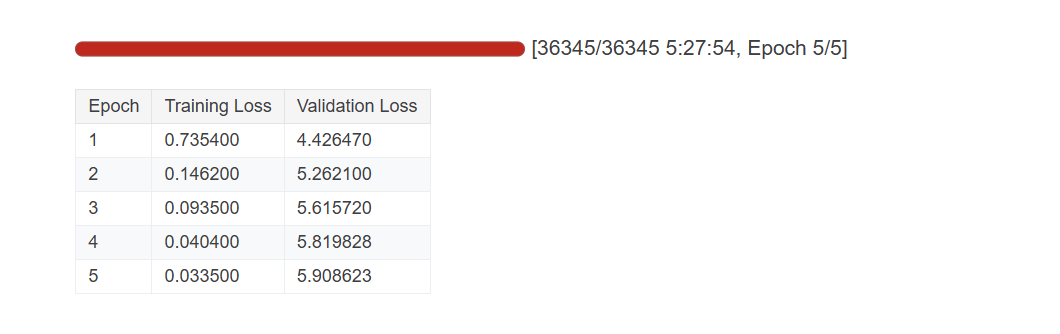

### Inference :

In [ ]:
from datasets import load_dataset, Dataset
import evaluate
from transformers import BartTokenizer, BartForConditionalGeneration
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq
from collections import defaultdict
import nltk
import numpy as np
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

# Load tokenizer & model
model_path = "/kaggle/input/bart_base_finetuned/transformers/default/1/bart_finetuned_chunked"
tokenizer = BartTokenizer.from_pretrained(model_path)
model = BartForConditionalGeneration.from_pretrained(model_path)

# Load test dataset
test_dataset_raw = load_dataset('json', data_files='/kaggle/input/capstone-datasets/bart_test._gold.jsonl')['train']

# Chunking utility
def chunk_src_text(text, tokenizer, max_length=1024, stride=512):
    input_ids = tokenizer.encode(text, add_special_tokens=False)
    chunks = []
    for start_idx in range(0, len(input_ids), stride):
        end_idx = start_idx + max_length
        chunk_ids = input_ids[start_idx:end_idx]
        if not chunk_ids:
            continue
        chunk_text = tokenizer.decode(chunk_ids, skip_special_tokens=True)
        chunks.append(chunk_text)
        if end_idx >= len(input_ids):
            break
    return chunks

# Expand dataset with chunks
def expand_with_chunks(dataset):
    expanded = []
    for idx, example in enumerate(dataset):
        split_parts = example['src'].split('</s>')
        if len(split_parts) < 2:
            continue
        query = split_parts[0].strip() + ' </s>'
        content = '</s>'.join(split_parts[1:]).strip()
        target = example['tgt']
        chunks = chunk_src_text(content, tokenizer, max_length=1024, stride=512)
        for chunk in chunks:
            new_src = f"<s> {query} {chunk} </s>"
            expanded.append({'src': new_src, 'tgt': target, 'query_id': idx})
    return expanded

# Preprocess function
def preprocess(example):
    model_inputs = tokenizer(example['src'], max_length=1024, truncation=True)
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(example['tgt'], max_length=128, truncation=True)
    model_inputs["labels"] = labels["input_ids"]
    model_inputs["query_id"] = example["query_id"]
    return model_inputs

# Deduplicate and select top-k
def dedup_and_select_top_k(chunks, top_k=5):
    unique_chunks = list(set(chunks))
    sorted_chunks = sorted(unique_chunks, key=len, reverse=True)[:top_k]
    seen_sentences = set()
    final_sentences = []
    for chunk in sorted_chunks:
        for sent in sent_tokenize(chunk):
            s = sent.strip()
            if s and s not in seen_sentences:
                seen_sentences.add(s)
                final_sentences.append(s)
    return " ".join(final_sentences)

# Expand and tokenize test set
test_expanded = expand_with_chunks(test_dataset_raw)
expanded_ds = Dataset.from_list(test_expanded)
tokenized_test = expanded_ds.map(preprocess, remove_columns=expanded_ds.column_names)

# Setup trainer
training_args = Seq2SeqTrainingArguments(
    output_dir="/kaggle/working/eval_output_bart_base",
    per_device_eval_batch_size=4,
    predict_with_generate=True,
    do_predict=True,
    report_to="none"
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    tokenizer=tokenizer,
    data_collator=DataCollatorForSeq2Seq(tokenizer, model)
)

# Predict
predictions = trainer.predict(tokenized_test)
generated_ids = predictions.predictions
generated_texts = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)

# Aggregate by query
query_outputs = defaultdict(list)
for i, example in enumerate(test_expanded):
    qid = example['query_id']
    query_outputs[qid].append(generated_texts[i])

final_predictions = []
for qid in sorted(query_outputs.keys()):
    merged = dedup_and_select_top_k(query_outputs[qid], top_k=5)
    final_predictions.append(merged)

# References
references = [example['tgt'] for example in test_dataset_raw]

# Evaluation - ROUGE + BLEU + BERTScore
rouge = evaluate.load("rouge")
bleu = evaluate.load("bleu")
bertscore = evaluate.load("bertscore")

rouge_scores = rouge.compute(predictions=final_predictions, references=references)
bleu_scores = bleu.compute(predictions=[p.split() for p in final_predictions], references=[[r.split()] for r in references])
bertscore_scores = bertscore.compute(predictions=final_predictions, references=references, lang="en")

# Summarize metrics
metrics_summary = {
    "ROUGE-1": round(rouge_scores["rouge1"], 4),
    "ROUGE-2": round(rouge_scores["rouge2"], 4),
    "ROUGE-L": round(rouge_scores["rougeL"], 4),
    "BLEU": round(bleu_scores["bleu"], 4),
    "BERTScore (F1)": round(np.mean(bertscore_scores["f1"]), 4)
}

metrics_summary, final_predictions[:3], references[:3]



## 2.T5 Model :

In [ ]:
from datasets import load_dataset, Dataset
from transformers import T5Tokenizer, T5ForConditionalGeneration, Seq2SeqTrainer, Seq2SeqTrainingArguments, DataCollatorForSeq2Seq

# Load dataset
train_dataset = load_dataset('json', data_files='/kaggle/input/capstone-datasets/bart_train._gold.jsonl')['train']
val_dataset = load_dataset('json', data_files='/kaggle/input/capstone-datasets/bart_val._gold.jsonl')['train']

tokenizer = T5Tokenizer.from_pretrained('t5-base')  # Or 't5-large'

max_input_length = 512
max_target_length = 128

def chunk_src_text(text, tokenizer, max_length=512, stride=256):
    input_ids = tokenizer.encode(text, add_special_tokens=False)
    chunks = []
    for start_idx in range(0, len(input_ids), stride):
        end_idx = start_idx + max_length
        chunk_ids = input_ids[start_idx:end_idx]
        if not chunk_ids:
            continue
        chunk_text = tokenizer.decode(chunk_ids, skip_special_tokens=True)
        chunks.append(chunk_text)
        if end_idx >= len(input_ids):
            break
    return chunks

def expand_with_chunks(dataset):
    expanded = []

    for example in dataset:
        split_parts = example['src'].split('</s>')
        if len(split_parts) < 2:
            continue

        query = split_parts[0].strip() + ' </s>'
        content = '</s>'.join(split_parts[1:]).strip()
        target = example['tgt']

        chunks = chunk_src_text(content, tokenizer, max_length=512, stride=256)

        for chunk in chunks:
            new_src = f"summarize: {query} {chunk}"
            expanded.append({'src': new_src, 'tgt': target})

    return expanded 

train_expanded = expand_with_chunks(train_dataset)
val_expanded = expand_with_chunks(val_dataset)

def preprocess(example):
    model_inputs = tokenizer(example['src'], max_length=max_input_length, truncation=True, padding='max_length')
    with tokenizer.as_target_tokenizer():
        labels = tokenizer(example['tgt'], max_length=max_target_length, truncation=True, padding='max_length')
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

train_dataset = Dataset.from_list(train_expanded).map(preprocess)
val_dataset = Dataset.from_list(val_expanded).map(preprocess)

# Load T5 model
model = T5ForConditionalGeneration.from_pretrained("t5-base")

# Training arguments
training_args = Seq2SeqTrainingArguments(
    output_dir="/kaggle/working/t5_base_finetuned",
    evaluation_strategy="epoch",
    learning_rate=3e-5,
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    weight_decay=0.01,
    save_total_limit=2,
    num_train_epochs=5,
    predict_with_generate=True,
    logging_dir="/kaggle/working/logs",
    logging_steps=10,
    save_strategy="epoch",
    report_to="none"
)

# Trainer
trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    tokenizer=tokenizer,
    data_collator=DataCollatorForSeq2Seq(tokenizer, model)
)

# Train
trainer.train()


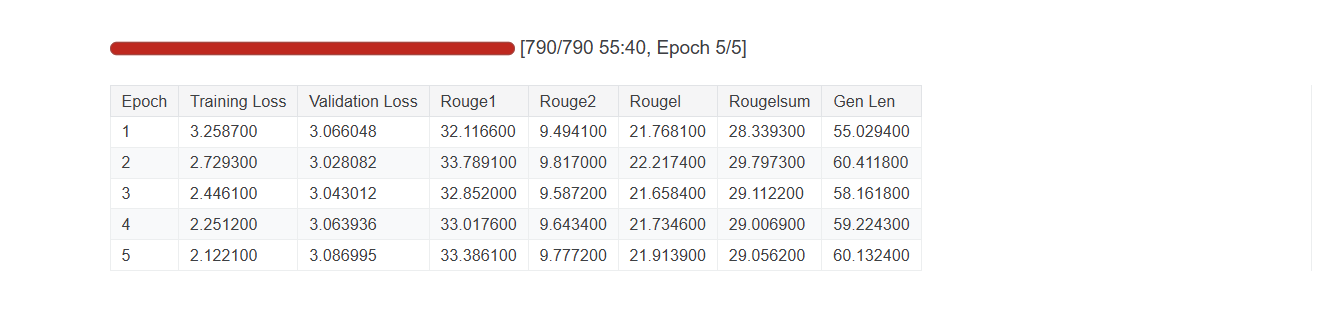

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration
from datasets import load_dataset, Dataset
import evaluate
import nltk
import torch
from tqdm import tqdm

nltk.download('punkt')

# ====== Load model & tokenizer ======
model_path = "/kaggle/working/t5_base_finetuned"  # Replace with your saved model dir
tokenizer = T5Tokenizer.from_pretrained(model_path)
model = T5ForConditionalGeneration.from_pretrained(model_path).to("cuda" if torch.cuda.is_available() else "cpu")

# ====== Load test data ======
test_dataset = load_dataset('json', data_files="/kaggle/input/capstone-datasets/bart_test.json")["train"]

# ====== Expand with chunks ======
def chunk_src_text(text, tokenizer, max_length=512, stride=256):
    input_ids = tokenizer.encode(text, add_special_tokens=False)
    chunks = []
    for start_idx in range(0, len(input_ids), stride):
        end_idx = start_idx + max_length
        chunk_ids = input_ids[start_idx:end_idx]
        if not chunk_ids:
            continue
        chunk_text = tokenizer.decode(chunk_ids, skip_special_tokens=True)
        chunks.append(chunk_text)
        if end_idx >= len(input_ids):
            break
    return chunks

def expand_with_chunks(dataset):
    expanded = []

    for example in dataset:
        split_parts = example['src'].split('</s>')
        if len(split_parts) < 2:
            continue

        query = split_parts[0].strip() + ' </s>'
        content = '</s>'.join(split_parts[1:]).strip()
        target = example['tgt']

        chunks = chunk_src_text(content, tokenizer, max_length=512, stride=256)

        for chunk in chunks:
            new_src = f"summarize: {query} {chunk}"
            expanded.append({'src': new_src, 'tgt': target})

    return expanded

expanded_test = expand_with_chunks(test_dataset)

# ====== Inference ======
generated_summaries = []
reference_summaries = []

for example in tqdm(expanded_test):
    input_text = example["src"]
    target_text = example["tgt"]
    
    inputs = tokenizer(input_text, return_tensors="pt", truncation=True, max_length=512).to(model.device)
    
    with torch.no_grad():
        output_ids = model.generate(**inputs, max_length=128, num_beams=4)
    
    decoded = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    generated_summaries.append(decoded)
    reference_summaries.append(target_text)

# ====== Evaluation Metrics ======
rouge = evaluate.load("rouge")
bleu = evaluate.load("bleu")
bertscore = evaluate.load("bertscore")

# Format for BLEU
bleu_result = bleu.compute(predictions=generated_summaries,
                           references=[[ref] for ref in reference_summaries])

# Format for ROUGE
rouge_result = rouge.compute(predictions=generated_summaries,
                             references=reference_summaries,
                             use_stemmer=True)

# Format for BERTScore
bertscore_result = bertscore.compute(predictions=generated_summaries,
                                     references=reference_summaries,
                                     lang="en")

# ====== Print Results ======
print("\n🔍 Evaluation Results:")
print(f"ROUGE-L: {rouge_result['rougeL']:.4f}")
print(f"BLEU: {bleu_result['bleu']:.4f}")
print(f"BERTScore F1: {sum(bertscore_result['f1']) / len(bertscore_result['f1']):.4f}")

# ====== Show 5 Sample Outputs ======
print("\n📌 Sample Generated vs Actual Summaries:\n")

for i in range(5):
    print(f"Sample {i+1}")
    print("🔹 Input (truncated):", expanded_test[i]["src"][:200].replace('\n', ' ') + "...")
    print("✅ Reference Summary:", reference_summaries[i])
    print("📝 Generated Summary:", generated_summaries[i])
    print("-" * 100)



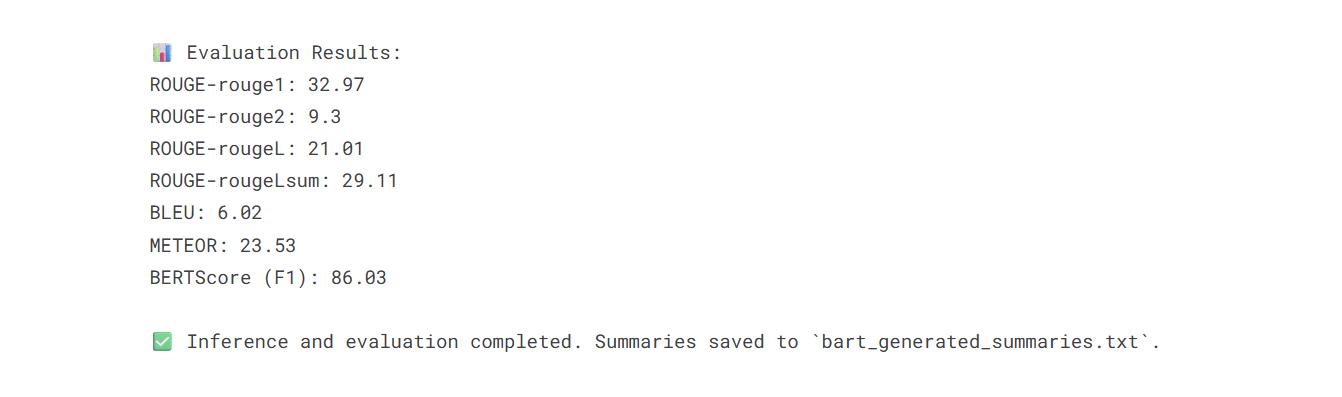

## 3. Bart Large Xsum :

In [ ]:
from datasets import load_dataset, Dataset
import numpy as np
from transformers import BartTokenizer
from transformers import BartForConditionalGeneration
from transformers import DataCollatorForSeq2Seq
import json
import evaluate
metric = evaluate.load("rouge")
from transformers import Seq2SeqTrainingArguments
from transformers import Seq2SeqTrainer
import nltk
nltk.download("punkt")

def load_jsonl(filepath):
    with open(filepath) as f:
        return [json.loads(line) for line in f]

# Load your training, validation, and test datasets
train_data = load_jsonl("/kaggle/input/bart-dataset/bart_data/bart_train.jsonl")
val_data = load_jsonl("/kaggle/input/bart-dataset/bart_data/bart_val.jsonl")
test_data = load_jsonl("/kaggle/input/bart-dataset/bart_data/bart_test.jsonl")

train_ds = Dataset.from_list(train_data)
val_ds = Dataset.from_list(val_data)
test_ds = Dataset.from_list(test_data)


checkpoint = "facebook/bart-large-xsum"
tokenizer = BartTokenizer.from_pretrained(checkpoint)
model = BartForConditionalGeneration.from_pretrained(checkpoint)

# Define Data Collator
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

def preprocess_function(examples):
    inputs = examples['src']
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True)

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples['tgt'], max_length=128, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_train = train_ds.map(preprocess_function, batched=True, remove_columns=['src', 'tgt'])
tokenized_val = val_ds.map(preprocess_function, batched=True, remove_columns=['src', 'tgt'])
tokenized_test = test_ds.map(preprocess_function, batched=True, remove_columns=['src', 'tgt'])

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]

    result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    result = {key: value * 100 for key, value in result.items()}
    result["gen_len"] = np.mean([np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions])
    return {k: round(v, 4) for k, v in result.items()}


training_args = Seq2SeqTrainingArguments(
    output_dir="bart_meeting_large_normal",
    logging_strategy="epoch",
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,
    num_train_epochs=5,
    learning_rate=2e-5,
    weight_decay=0.01,
    save_total_limit=2,
    predict_with_generate=True,
    fp16=True,
    report_to="none"
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

trainer.train()

model.save_pretrained("bart_large_xsum_normal")
tokenizer.save_pretrained("bart_large_xsum_normal")


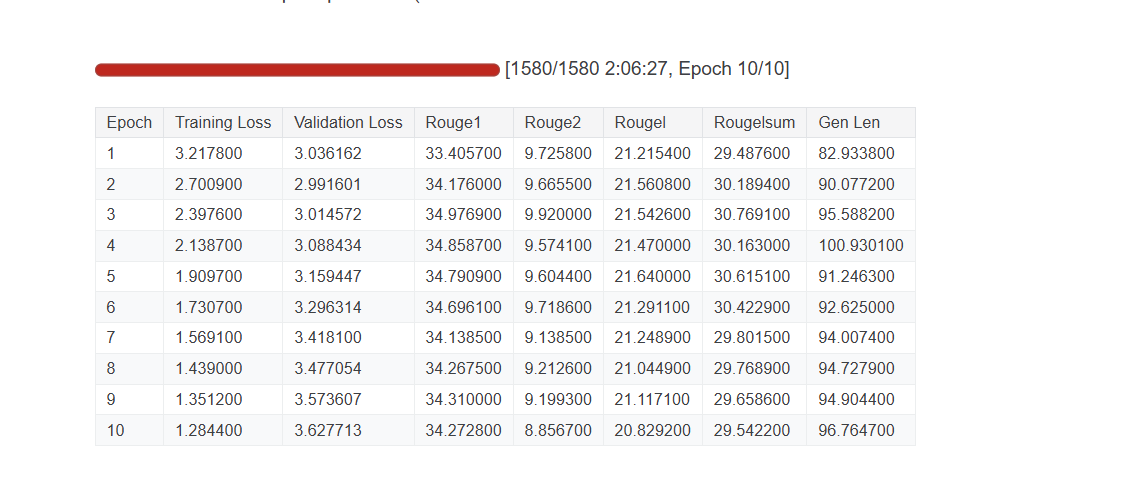

In [ ]:
from transformers import BartTokenizer, BartForConditionalGeneration
from datasets import Dataset
import json
from tqdm import tqdm
import evaluate
import numpy as np
import nltk

nltk.download("punkt")

# === 1. Load test data ===
def load_jsonl(filepath):
    with open(filepath) as f:
        return [json.loads(line) for line in f]

test_data = load_jsonl("/kaggle/input/bart-dataset/bart_data/bart_test.jsonl")  # Update path if needed
test_dataset = Dataset.from_list(test_data)

# === 2. Load fine-tuned model and tokenizer ===
model_path = "/kaggle/working/bart_large_xsum_normal"
tokenizer = BartTokenizer.from_pretrained(model_path)
model = BartForConditionalGeneration.from_pretrained(model_path)
model.eval()

# === 3. Load metrics ===
rouge = evaluate.load("rouge")
bleu = evaluate.load("bleu")
bertscore = evaluate.load("bertscore")
meteor = evaluate.load("meteor")

# === 4. Inference function ===
def generate_summary(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=1024, truncation=True, padding=True)
    input_ids = inputs["input_ids"]
    attention_mask = inputs["attention_mask"]
    outputs = model.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=128)
    decoded = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return decoded

# === 5. Run inference and collect results ===
predictions = []
references = []
generated_summaries = []

for item in tqdm(test_data):
    pred = generate_summary(item["src"])
    # Sentence-split to align with metrics
    predictions.append("\n".join(nltk.sent_tokenize(pred.strip())))
    references.append("\n".join(nltk.sent_tokenize(item["tgt"].strip())))
    generated_summaries.append(pred)

# === 6. Compute ROUGE ===
rouge_results = rouge.compute(predictions=predictions, references=references, use_stemmer=True)
rouge_results = {k: round(v * 100, 2) for k, v in rouge_results.items()}

# === 7. Compute BLEU ===
bleu_result = bleu.compute(predictions=predictions, references=[[ref] for ref in references])
bleu_score = round(bleu_result['bleu'] * 100, 2)

# === 8. Compute METEOR ===
meteor_result = meteor.compute(predictions=predictions, references=references)
meteor_score = round(meteor_result["meteor"] * 100, 2)

# === 9. Compute BERTScore ===
bertscore_result = bertscore.compute(predictions=predictions, references=references, lang="en")
bertscore_f1 = round(np.mean(bertscore_result["f1"]) * 100, 2)

# === 10. Print All Results ===
print("\n📊 Evaluation Results:")
for k, v in rouge_results.items():
    print(f"ROUGE-{k}: {v}")
print(f"BLEU: {bleu_score}")
print(f"METEOR: {meteor_score}")
print(f"BERTScore (F1): {bertscore_f1}")

# === 11. Save generated summaries ===
with open("bart_generated_summaries.txt", "w") as f:
    for summary in generated_summaries:
        f.write(summary.strip() + "\n")

print("\n✅ Inference and evaluation completed. Summaries saved to `bart_generated_summaries.txt`.")

print("\n📋 Reference vs Predicted Summaries:\n")

for i in range(5):  # Change 5 to a higher number if you want more samples
    print(f"🟦 Sample {i+1}")
    print("🔹 Reference Summary:")
    print(test_data[i]['tgt'].strip())
    print("\n🔸 Predicted Summary:")
    print(generated_summaries[i].strip())
    print("="*80)



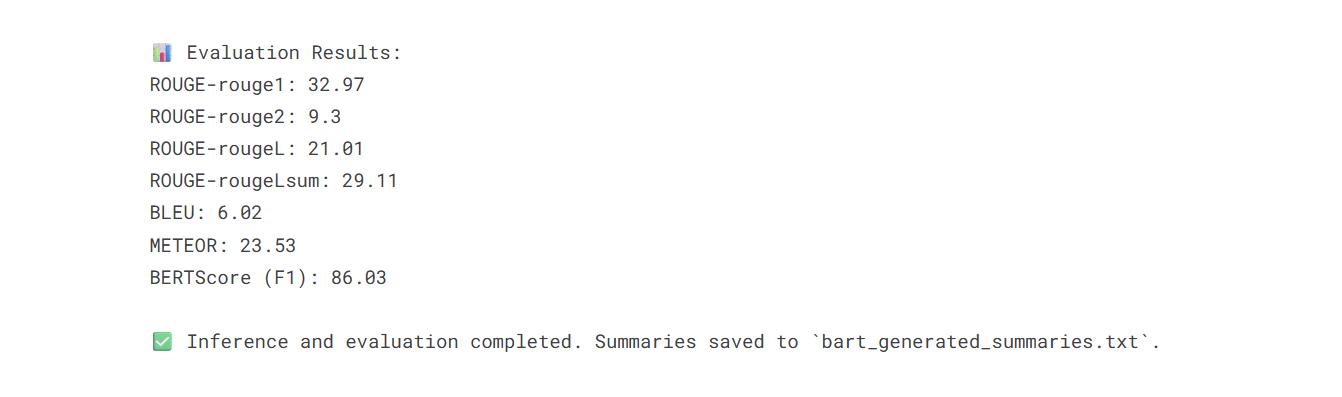

## 4.Bart Large CNN :

In [ ]:
from datasets import load_dataset, Dataset
import numpy as np
from transformers import BartTokenizer
from transformers import BartForConditionalGeneration
from transformers import DataCollatorForSeq2Seq
import evaluate
metric = evaluate.load("rouge")
import json
from transformers import Seq2SeqTrainingArguments
from transformers import Seq2SeqTrainer
import nltk
nltk.download("punkt")

def load_jsonl(filepath):
    with open(filepath) as f:
        return [json.loads(line) for line in f]

# Load your training, validation, and test datasets
train_data = load_jsonl("/kaggle/input/bart-dataset/bart_data/bart_train.jsonl")
val_data = load_jsonl("/kaggle/input/bart-dataset/bart_data/bart_val.jsonl")
test_data = load_jsonl("/kaggle/input/bart-dataset/bart_data/bart_test.jsonl")

train_ds = Dataset.from_list(train_data)
val_ds = Dataset.from_list(val_data)
test_ds = Dataset.from_list(test_data)


checkpoint = "facebook/bart-large-cnn"
tokenizer = BartTokenizer.from_pretrained(checkpoint)
model = BartForConditionalGeneration.from_pretrained(checkpoint)


# Define Data Collator
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

def preprocess_function(examples):
    inputs = examples['src']
    model_inputs = tokenizer(inputs, max_length=1024, truncation=True)

    with tokenizer.as_target_tokenizer():
        labels = tokenizer(examples['tgt'], max_length=1024, truncation=True)

    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_train = train_ds.map(preprocess_function, batched=True, remove_columns=['src', 'tgt'])
tokenized_val = val_ds.map(preprocess_function, batched=True, remove_columns=['src', 'tgt'])
tokenized_test = test_ds.map(preprocess_function, batched=True, remove_columns=['src', 'tgt'])  

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(predictions, skip_special_tokens=True)
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    decoded_preds = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in decoded_preds]
    decoded_labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in decoded_labels]

    result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
    result = {key: value * 100 for key, value in result.items()}
    result["gen_len"] = np.mean([np.count_nonzero(pred != tokenizer.pad_token_id) for pred in predictions])
    return {k: round(v, 4) for k, v in result.items()}



training_args = Seq2SeqTrainingArguments(
    output_dir="bart_meeting_output",
    logging_strategy="epoch", 
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=4,
    gradient_accumulation_steps=2,
    num_train_epochs=10,
    learning_rate=2e-5,
    weight_decay=0.01,
    save_total_limit=2,
    predict_with_generate=True,
    fp16=True,
    report_to="none"
)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_val,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

trainer.train() 
model.save_pretrained("bart_meeting_finetuned_cnn_normal")
tokenizer.save_pretrained("bart_meeting_finetuned_cnn_normal")

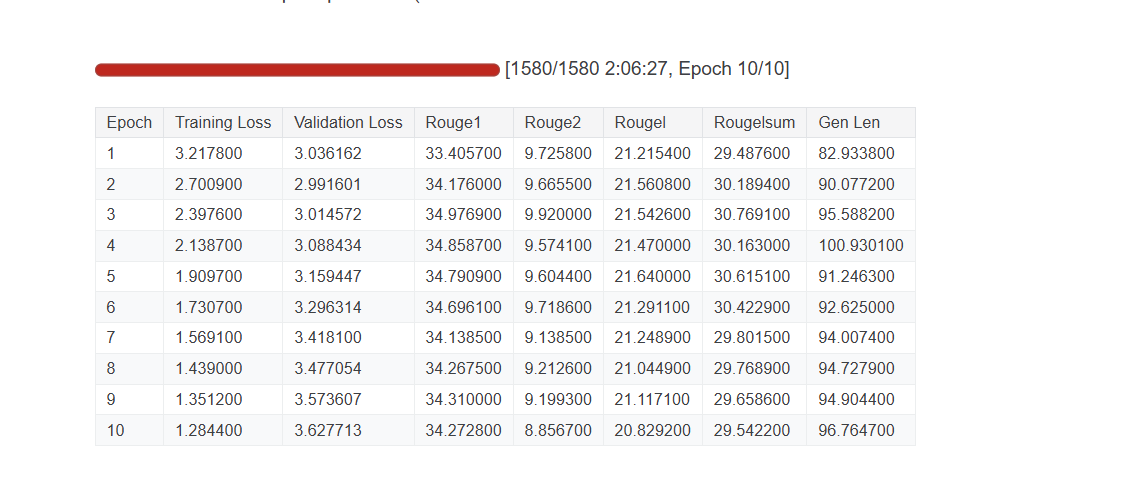

In [ ]:
from transformers import BartForConditionalGeneration, BartTokenizer
from datasets import load_dataset, Dataset
import json
import numpy as np
import nltk
import evaluate
import torch


nltk.download("punkt")

# === Load tokenizer and model ===
checkpoint_dir = "/kaggle/input/bart_large_cnn_normal/transformers/default/1/bart_meeting_finetuned_cnn_normal"  # or path to your saved model dir
tokenizer = BartTokenizer.from_pretrained(checkpoint_dir)
model = BartForConditionalGeneration.from_pretrained(checkpoint_dir)
model.eval()

# === Load test data ===
def load_jsonl(filepath):
    with open(filepath) as f:
        return [json.loads(line) for line in f]

test_data = load_jsonl("/kaggle/input/bart-dataset/bart_data/bart_test.jsonl")
test_ds = Dataset.from_list(test_data)

# === Preprocess ===
def preprocess_function(examples):
    inputs = tokenizer(examples['src'], max_length=1024, truncation=True, padding="max_length", return_tensors="pt")
    return inputs

# Preprocess in batches
batch_size = 8
results = []
decoded_preds = []
decoded_labels = []

metric = evaluate.load("rouge")

for i in range(0, len(test_ds), batch_size):
    batch = test_ds[i:i+batch_size]
    inputs = tokenizer(batch["src"], max_length=1024, truncation=True, padding=True, return_tensors="pt")

    with torch.no_grad():
        output_ids = model.generate(
            input_ids=inputs["input_ids"],
            attention_mask=inputs["attention_mask"],
            max_length=256,
            num_beams=4,
            early_stopping=True
        )

    # Decode predictions and labels
    predictions = tokenizer.batch_decode(output_ids, skip_special_tokens=True)
    labels = batch["tgt"]
    
    # Clean sentences
    predictions = ["\n".join(nltk.sent_tokenize(pred.strip())) for pred in predictions]
    labels = ["\n".join(nltk.sent_tokenize(label.strip())) for label in labels]

    decoded_preds.extend(predictions)
    decoded_labels.extend(labels)

# === Compute ROUGE ===
scores = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)
scores = {k: round(v * 100, 2) for k, v in scores.items()}
print("ROUGE scores on test set:", scores)

# === Optional: Save predictions ===
output_path = "bart_test_predictions_normal.jsonl"
with open(output_path, "w") as f:
    for src, pred, gold in zip(test_ds["src"], decoded_preds, decoded_labels):
        json.dump({"src": src, "predicted": pred, "gold": gold}, f)
        f.write("\n")

# === Compute BERTScore ===
bertscore = evaluate.load("bertscore")
bert_results = bertscore.compute(predictions=decoded_preds, references=decoded_labels, lang="en")

# Compute average BERTScore values
avg_bertscore = {
    "precision": round(np.mean(bert_results["precision"]) * 100, 2),
    "recall": round(np.mean(bert_results["recall"]) * 100, 2),
    "f1": round(np.mean(bert_results["f1"]) * 100, 2),
}

print("\nBERTScore on test set:")
for key, val in avg_bertscore.items():
    print(f"{key.capitalize()}: {val}")


print(f"\nSaved predictions to: {output_path}")

# === Print 5 sample actual vs predicted summaries ===
print("\n🧪 Sample Predictions (Actual vs Predicted Summaries):")
for i in range(5):
    print(f"\n🟩 Sample {i+1}")
    print(f"📌 Source Input (truncated): {test_ds[i]['src'][:200]}...")
    print(f"✅ Actual Summary:\n{decoded_labels[i]}")
    print(f"🧠 Predicted Summary:\n{decoded_preds[i]}")



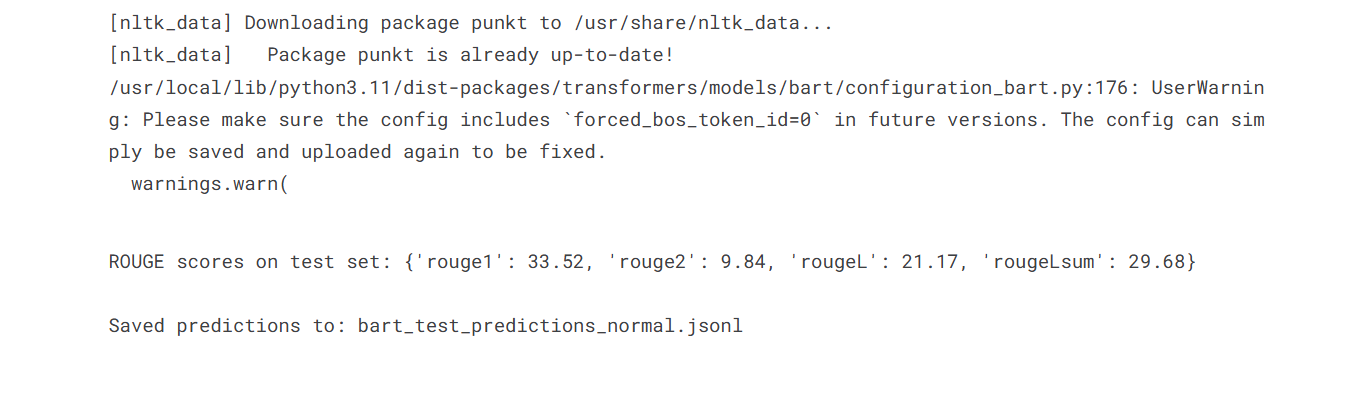